In [78]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
matplotlib.rc('font', **krfont)

In [3]:
price_index_1 = pd.read_csv('철광석 vs 주요지수 합집합(lag)_1.csv',encoding='euc-kr')
price_index_2 = pd.read_csv('철광석 vs 주요지수 합집합(lag)_2.csv',encoding='euc-kr')
price_ship = pd.read_csv('철광석 vs 해상운임지수 합집합(lag).csv',encoding='euc-kr')
price_exchange = pd.read_csv('철광석 vs 주요환율 합집합(lag).csv',encoding='euc-kr')

In [4]:
price_index_1.columns=['날짜', 'target',
       'Bloomberg(DJ-UBS) Commodity Index1991=100',
       'Bloomberg Commodity Total Return1991=100', 'TR/CC CRB Index1967=100',
       'S&P GSCI1970=100', 'GSCI Energy1970=100', 'GSCI Petroleum1970=100',
       'GSCI Non-Energy1970=100', 'GSCI Reduced Energy Index (CPW 2)1970=100',
       'GSCI Light Energy Index (CPW 4)1970=100',
       'GSCI Industrial Metals1970=100', 'GSCI Precious Metals1970=100',
       'GSCI Agriculture1970=100', 'GSCI Livestock1970=100',
       'GSCI Softs1970=100', 'Reuters Index of Commodity Prices1931.09.18=100',
       'CRB BLS Spot Index1967=100', 'PDS 원자재 지수2015.01.02=100',
       'PDS 귀금속 하위지수2015.01.02=100']

In [5]:
price_index_2.columns=['날짜', 'target',
       'PDS 에너지 하위지수2015.01.02=100', 'PDS 비철금속 하위지수2015.01.02=100',
       'PDS 철강 하위지수2015.01.02=100', 'PDS 석유화학 하위지수2015.01.02=100',
       'PDS 농산물 하위지수2015.01.02=100', 'LMEX Index1999.04=1000',
       'US Dollar IndexMar 1973=100',
       'DRAMeXchange Index (DXI)2001.10.01=1000', 'TOCOM Index2002.05.31=100',
       'Rogers International Commodities Index1998.07.31=1000',
       'Rogers International Commodities Index Energy1998.07.31=1000',
       'Rogers International Commodities Index Metals1998.07.31=1000',
       'Rogers International Commodities Index Agriculture1998.07.31=1000']

In [6]:
price_ship.columns=['날짜', 'target',
       'Baltic Dry Index (BDI)1985.01.04',
       'Baltic Capesize Index (BCI)1999.03.01',
       'Baltic Panamax Index (BPI)1998.05.06',
       'Baltic Clean Tanker Index (BCTI)1998.08.03',
       'Baltic Dirty Tanker Index (BDTI)1998.08.03',
       'Baltic Supramax index (BSI)2005.01.01',
       'Baltic Handysize Index (BHSI)2006.05.23',
       'SSY/Pacific Capesize Index1997.1.6=4114',
       'SSY/Atlantic Capesize Index1997.1.6=5000',
       'Howe Robinson Container Index1997.1.15=1000',
       'China Containerized Freight Index (CCFI)1998.1.1=1000',
       'Shanghai Containerized Freight Index (SCFI)2009.10.16=1000',
       'China Coastal Bulk Freight Index (CBFI)2000.1.1=1000',
       'China Newbuilding Price Index (CNPI)2011.07.01=1000',
       'China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000',
       'China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000',
       'China Container Newbuilding Price Index (CNCPI)2011.07.01=1000']

In [7]:
price_exchange.columns=['날짜', 'target',
       'USD/KRW (미국 달러 / 한국 원)', 'CNY/KRW (중국 인민폐 / 한국 원)',
       'USD/CNY (미국 달러 / 중국 인민폐)']

## 시점에 따른 유사도 구하기

In [56]:
ship_index=price_ship[['날짜','Baltic Dry Index (BDI)1985.01.04',
       'Baltic Capesize Index (BCI)1999.03.01',
       'Baltic Panamax Index (BPI)1998.05.06',
       'Baltic Clean Tanker Index (BCTI)1998.08.03',
       'Baltic Dirty Tanker Index (BDTI)1998.08.03',
       'Baltic Supramax index (BSI)2005.01.01',
       'Baltic Handysize Index (BHSI)2006.05.23',
       'SSY/Pacific Capesize Index1997.1.6=4114',
       'SSY/Atlantic Capesize Index1997.1.6=5000',
       'Howe Robinson Container Index1997.1.15=1000',
       'China Containerized Freight Index (CCFI)1998.1.1=1000',
       'Shanghai Containerized Freight Index (SCFI)2009.10.16=1000',
       'China Coastal Bulk Freight Index (CBFI)2000.1.1=1000',
       'China Newbuilding Price Index (CNPI)2011.07.01=1000',
       'China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000',
       'China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000',
       'China Container Newbuilding Price Index (CNCPI)2011.07.01=1000']]


In [57]:
target=price_ship[:-1][['날짜','target']]
target.head()

,날짜,target
0,20180703,64.55
1,20180702,64.54
2,20180630,65.02
3,20180629,65.02
4,20180628,64.44


In [58]:
ship_t1=pd.merge(target,ship_index[1:],how='outer',on='날짜')
ship_t1=ship_t1.dropna()
ship_t1.head()

,날짜,target,Baltic Dry Index (BDI)1985.01.04,Baltic Capesize Index (BCI)1999.03.01,Baltic Panamax Index (BPI)1998.05.06,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Supramax index (BSI)2005.01.01,Baltic Handysize Index (BHSI)2006.05.23,SSY/Pacific Capesize Index1997.1.6=4114,SSY/Atlantic Capesize Index1997.1.6=5000,Howe Robinson Container Index1997.1.15=1000,China Containerized Freight Index (CCFI)1998.1.1=1000,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000
1,20180702,64.54,1422.0,2304.0,1338.0,500.0,705.0,1034.0,575.0,4997.0,8625.0,842.0,815.89,821.18,1105.50,801.0,828.0,855.0,821.0
2,20180630,65.02,1385.0,2170.0,1336.0,496.0,712.0,1042.0,581.0,4977.0,8038.0,842.0,815.89,821.18,1105.50,801.0,828.0,855.0,821.0
3,20180629,65.02,1385.0,2170.0,1336.0,496.0,712.0,1042.0,581.0,4977.0,8038.0,842.0,815.89,821.18,1105.50,794.0,824.0,849.0,810.0
4,20180628,64.44,1329.0,2025.0,1331.0,493.0,724.0,1055.0,583.0,4977.0,8038.0,842.0,812.18,751.13,1133.57,794.0,824.0,849.0,810.0
5,20180627,64.60,1309.0,1942.0,1324.0,496.0,727.0,1067.0,585.0,4977.0,8038.0,842.0,812.18,751.13,1133.57,794.0,824.0,849.0,810.0


In [72]:
ship_t1.corr()

,날짜,target,Baltic Dry Index (BDI)1985.01.04,Baltic Capesize Index (BCI)1999.03.01,Baltic Panamax Index (BPI)1998.05.06,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Supramax index (BSI)2005.01.01,Baltic Handysize Index (BHSI)2006.05.23,SSY/Pacific Capesize Index1997.1.6=4114,SSY/Atlantic Capesize Index1997.1.6=5000,Howe Robinson Container Index1997.1.15=1000,China Containerized Freight Index (CCFI)1998.1.1=1000,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000
날짜,1.000000,-0.522636,-0.116637,-0.124810,0.113923,-0.097532,-0.095749,-0.181190,-0.015115,-0.341881,-0.097747,0.261117,-0.701359,-0.459260,0.302304,-0.896589,-0.842287,-0.865420,-0.835663
target,-0.522636,1.000000,0.676828,0.544211,0.567728,0.002284,-0.031310,0.718575,0.675930,0.769670,0.609087,-0.162620,0.683665,0.696305,0.439417,0.394541,0.479296,0.189348,0.119158
Baltic Dry Index (BDI)1985.01.04,-0.116637,0.676828,1.000000,0.927974,0.906553,0.079716,-0.097378,0.899146,0.885646,0.915717,0.943189,0.171087,0.324936,0.411712,0.704216,-0.015367,0.107886,-0.212562,-0.267454
Baltic Capesize Index (BCI)1999.03.01,-0.124810,0.544211,0.927974,1.000000,0.756437,0.039157,-0.095697,0.737468,0.727225,0.882679,0.934914,0.090021,0.248015,0.333266,0.639708,-0.022978,0.076055,-0.188617,-0.234170
Baltic Panamax Index (BPI)1998.05.06,0.113923,0.567728,0.906553,0.756437,1.000000,0.088371,-0.073111,0.851610,0.878442,0.755707,0.809684,0.226584,0.165439,0.301025,0.753888,-0.234090,-0.105965,-0.415990,-0.464767
Baltic Clean Tanker Index (BCTI)1998.08.03,-0.097532,0.002284,0.079716,0.039157,0.088371,1.000000,0.507422,0.101095,0.067098,0.067845,0.064044,0.335493,0.300226,0.198708,0.045823,0.247077,0.261370,0.229041,0.231090
Baltic Dirty Tanker Index (BDTI)1998.08.03,-0.095749,-0.031310,-0.097378,-0.095697,-0.073111,0.507422,1.000000,-0.121977,-0.084400,-0.086291,-0.084884,-0.044855,0.112884,0.086784,-0.074391,0.143194,0.113757,0.174690,0.186570
Baltic Supramax index (BSI)2005.01.01,-0.181190,0.718575,0.899146,0.737468,0.851610,0.101095,-0.121977,1.000000,0.939982,0.836206,0.802512,0.246130,0.426608,0.494484,0.620034,0.118125,0.251142,-0.088496,-0.151019
Baltic Handysize Index (BHSI)2006.05.23,-0.015115,0.675930,0.885646,0.727225,0.878442,0.067098,-0.084400,0.939982,1.000000,0.792015,0.791965,0.198428,0.330276,0.451301,0.751416,-0.054098,0.093818,-0.266896,-0.339476
SSY/Pacific Capesize Index1997.1.6=4114,-0.341881,0.769670,0.915717,0.882679,0.755707,0.067845,-0.086291,0.836206,0.792015,1.000000,0.934945,0.099969,0.535184,0.565775,0.601593,0.237472,0.356734,0.022058,-0.038776


In [73]:
ship_t1.cov()

,날짜,target,Baltic Dry Index (BDI)1985.01.04,Baltic Capesize Index (BCI)1999.03.01,Baltic Panamax Index (BPI)1998.05.06,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Supramax index (BSI)2005.01.01,Baltic Handysize Index (BHSI)2006.05.23,SSY/Pacific Capesize Index1997.1.6=4114,SSY/Atlantic Capesize Index1997.1.6=5000,Howe Robinson Container Index1997.1.15=1000,China Containerized Freight Index (CCFI)1998.1.1=1000,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000
날짜,2.035792e+08,-181445.005693,-656883.455577,-1.685281e+06,647839.103225,-133961.028029,-167772.500039,-617734.425080,-28916.380458,-8.229872e+06,-2.831657e+06,412618.514886,-1.501604e+06,-1.269920e+06,715584.359409,-928711.588936,-928620.946925,-865198.556544,-530074.610694
target,-1.814450e+05,592.048330,6500.414892,1.253143e+04,5505.650190,5.350935,-93.557271,4177.830056,2205.151237,3.159615e+04,3.009053e+04,-438.226429,2.496146e+03,3.283437e+03,1773.802782,696.933837,901.143862,322.821233,128.896541
Baltic Dry Index (BDI)1985.01.04,-6.568835e+05,6500.414892,155800.375336,3.466372e+05,142615.725520,3028.968827,-4720.261886,84803.684250,46870.783046,6.098130e+05,7.558836e+05,7479.086737,1.924553e+04,3.149403e+04,46114.728031,-440.334462,3290.482153,-5878.854171,-4693.245774
Baltic Capesize Index (BCI)1999.03.01,-1.685281e+06,12531.433939,346637.153852,8.955924e+05,285310.328397,3567.206554,-11121.718436,166762.544351,92274.565471,1.409319e+06,1.796382e+06,9435.034621,3.521931e+04,6.112197e+04,100435.345644,-1578.661117,5561.567532,-12507.128349,-9852.049232
Baltic Panamax Index (BPI)1998.05.06,6.478391e+05,5505.650190,142615.725520,2.853103e+05,158847.164066,3390.505299,-3578.441868,81101.837463,46941.882488,5.081528e+05,6.552050e+05,10001.501444,9.894105e+03,2.325109e+04,49847.826815,-6773.205203,-3263.339089,-11617.025432,-8235.016432
Baltic Clean Tanker Index (BCTI)1998.08.03,-1.339610e+05,5.350935,3028.968827,3.567207e+03,3390.505299,9266.794656,5998.647404,2325.377330,866.033505,1.101880e+04,1.251736e+04,3576.802115,4.336718e+03,3.707078e+03,731.806664,1726.704189,1944.158063,1544.897230,988.973139
Baltic Dirty Tanker Index (BDTI)1998.08.03,-1.677725e+05,-93.557271,-4720.261886,-1.112172e+04,-3578.441868,5998.647404,15081.277403,-3579.283812,-1389.692755,-1.787871e+04,-2.116495e+04,-610.068805,2.080170e+03,2.065416e+03,-1515.609322,1276.632682,1079.467517,1503.172326,1018.593846
Baltic Supramax index (BSI)2005.01.01,-6.177344e+05,4177.830056,84803.684250,1.667625e+05,81101.837463,2325.377330,-3579.283812,57095.315491,30114.638624,3.371046e+05,3.893349e+05,6513.447832,1.529599e+04,2.289832e+04,24579.059130,2049.098637,4636.934565,-1481.643999,-1604.242283
Baltic Handysize Index (BHSI)2006.05.23,-2.891638e+04,2205.151237,46870.783046,9.227457e+04,46941.882488,866.033505,-1389.692755,30114.638624,17976.931898,1.791605e+05,2.155935e+05,2946.509495,6.644821e+03,1.172667e+04,16714.276615,-526.578029,971.980817,-2507.391483,-2023.516261
SSY/Pacific Capesize Index1997.1.6=4114,-8.229872e+06,31596.153337,609813.049962,1.409319e+06,508152.801806,11018.804096,-17878.707716,337104.629300,179160.505277,2.846444e+06,3.202648e+06,18679.332734,1.354884e+05,1.849889e+05,168384.980327,29086.047532,46505.841468,2607.604224,-2908.375401


In [71]:
ship_t1.corrwith(ship_t1.target)

날짜                                                               -0.522636
target                                                            1.000000
Baltic Dry Index (BDI)1985.01.04                                  0.676828
Baltic Capesize Index (BCI)1999.03.01                             0.544211
Baltic Panamax Index (BPI)1998.05.06                              0.567728
Baltic Clean Tanker Index (BCTI)1998.08.03                        0.002284
Baltic Dirty Tanker Index (BDTI)1998.08.03                       -0.031310
Baltic Supramax index (BSI)2005.01.01                             0.718575
Baltic Handysize Index (BHSI)2006.05.23                           0.675930
SSY/Pacific Capesize Index1997.1.6=4114                           0.769670
SSY/Atlantic Capesize Index1997.1.6=5000                          0.609087
Howe Robinson Container Index1997.1.15=1000                      -0.162620
China Containerized Freight Index (CCFI)1998.1.1=1000             0.683665
Shanghai Containerized Fr

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
g = sns.FacetGrid(ship_t1, col="target",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot)


ValueError: Image size of 720x190440 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f01cf02cbf8> (for post_execute):


ValueError: Image size of 720x190440 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 720x190440 pixels is too large. It must be less than 2^16 in each direction.

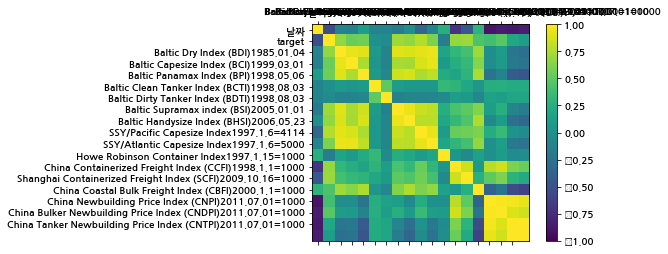

In [91]:
ship_t1.corr()
correlations = ship_t1.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,18,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ship_t1.columns)
ax.set_yticklabels(ship_t1.columns)
plt.show()

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(ship_t1['target'],ship_t1['Baltic Dry Index (BDI)1985.01.04'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 64.54  65.02  65.02 ... 132.07 132.07 132.07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## EDA

### 철광석 추이를 쫌 봐야겠다

In [42]:
ship_index=price_ship[['날짜','Baltic Dry Index (BDI)1985.01.04',
       'Baltic Capesize Index (BCI)1999.03.01',
       'Baltic Panamax Index (BPI)1998.05.06',
       'Baltic Clean Tanker Index (BCTI)1998.08.03',
       'Baltic Dirty Tanker Index (BDTI)1998.08.03',
       'Baltic Supramax index (BSI)2005.01.01',
       'Baltic Handysize Index (BHSI)2006.05.23',
       'SSY/Pacific Capesize Index1997.1.6=4114',
       'SSY/Atlantic Capesize Index1997.1.6=5000',
       'Howe Robinson Container Index1997.1.15=1000',
       'China Containerized Freight Index (CCFI)1998.1.1=1000',
       'Shanghai Containerized Freight Index (SCFI)2009.10.16=1000',
       'China Coastal Bulk Freight Index (CBFI)2000.1.1=1000',
       'China Newbuilding Price Index (CNPI)2011.07.01=1000',
       'China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000',
       'China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000',
       'China Container Newbuilding Price Index (CNCPI)2011.07.01=1000']]


In [9]:
price_ship.describe()

,날짜,target,Baltic Dry Index (BDI)1985.01.04,Baltic Capesize Index (BCI)1999.03.01,Baltic Panamax Index (BPI)1998.05.06,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Supramax index (BSI)2005.01.01,Baltic Handysize Index (BHSI)2006.05.23,SSY/Pacific Capesize Index1997.1.6=4114,SSY/Atlantic Capesize Index1997.1.6=5000,Howe Robinson Container Index1997.1.15=1000,China Containerized Freight Index (CCFI)1998.1.1=1000,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000
count,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1318.000000,1318.000000,1316.000000,1319.000000,1319.000000,1265.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,2.015561e+07,76.918142,1009.057576,1680.630303,996.409848,580.531818,755.837121,824.359091,476.965909,4343.710167,5927.469651,551.108435,887.450061,837.640591,1005.700941,851.576542,851.902513,917.554455,850.731912
std,1.490460e+04,26.689976,390.200020,940.334010,391.089452,94.314464,123.448767,234.788818,131.870567,1684.628664,2004.249353,109.278459,153.349325,197.324589,165.859376,71.419976,75.899683,68.772592,43.670499
min,2.013070e+07,38.300000,290.000000,161.000000,282.000000,346.000000,416.000000,243.000000,183.000000,1594.000000,2419.000000,392.000000,632.360000,400.430000,771.010000,759.000000,747.000000,818.000000,782.000000
25%,2.014093e+07,57.910000,720.000000,954.000000,678.000000,522.000000,655.000000,665.000000,377.000000,2941.000000,4203.750000,467.000000,772.270000,705.190000,867.490000,780.000000,783.000000,844.000000,806.000000
50%,2.015123e+07,67.670000,966.000000,1575.000000,940.000000,564.500000,747.000000,849.000000,475.000000,4076.000000,5792.000000,535.050000,837.740000,824.180000,969.660000,851.000000,832.000000,930.000000,861.000000
75%,2.017033e+07,87.722500,1215.000000,2265.750000,1290.750000,628.000000,835.500000,954.500000,581.000000,5379.000000,7238.000000,607.600000,1059.980000,1009.170000,1140.270000,923.000000,929.000000,991.000000,895.000000
max,2.018070e+07,144.180000,2337.000000,4329.000000,2096.000000,867.000000,1344.000000,1562.000000,821.000000,9548.000000,11593.000000,846.000000,1170.590000,1195.360000,1597.830000,960.000000,981.000000,1003.000000,906.000000


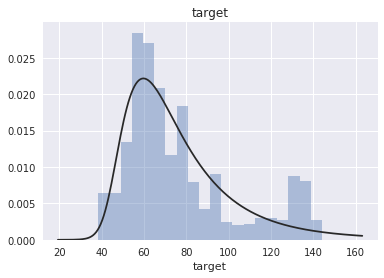

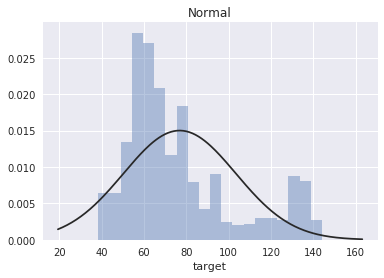

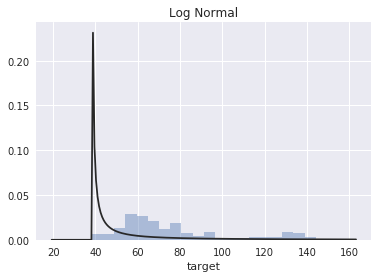

In [51]:
import scipy.stats as st
y = price_exchange['target']
plt.figure(1); plt.title('target')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

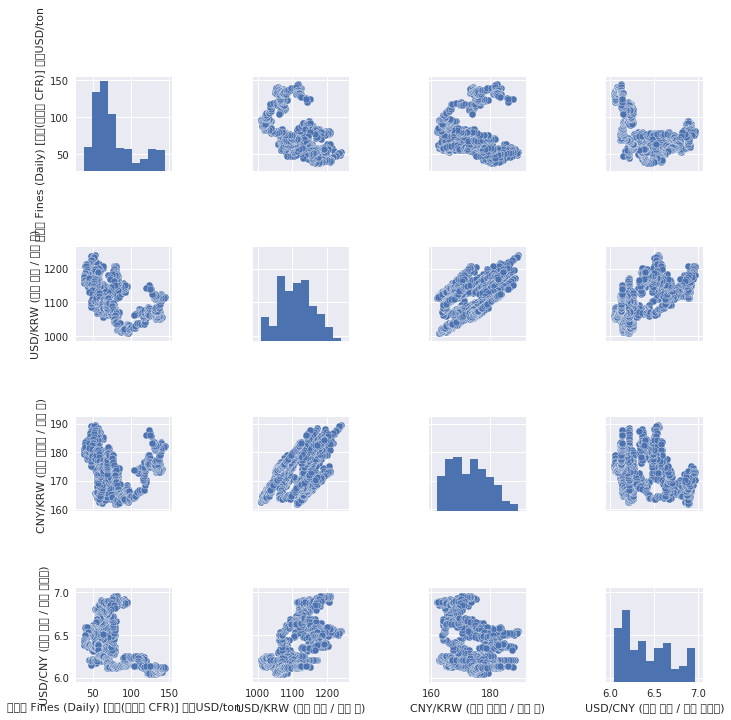

In [46]:
sns.set()
cols = ['철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton',
       'USD/KRW (미국 달러 / 한국 원)', 'CNY/KRW (중국 인민폐 / 한국 원)',
       'USD/CNY (미국 달러 / 중국 인민폐)']
sns.pairplot(price_exchange[cols], size = 2.5)
plt.show();

In [24]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 5 columns):
날짜                                           1302 non-null int64
철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton    1302 non-null float64
USD/KRW (미국 달러 / 한국 원)                       1302 non-null float64
CNY/KRW (중국 인민폐 / 한국 원)                      1302 non-null float64
USD/CNY (미국 달러 / 중국 인민폐)                     1302 non-null float64
dtypes: float64(4), int64(1)
memory usage: 50.9 KB


In [6]:
# NA 값이 너무많으므로 일단 다 제거해보자
price=price.dropna(how='any')
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 20 columns):
날짜                                          256 non-null int64
철광석 Fines (Daily) [중국(수입가 CFR)] 현물          256 non-null float64
날짜.1                                        256 non-null float64
철광석 62% [DCE] 2018.09                       256 non-null float64
날짜.2                                        256 non-null float64
고철 HMS No.1 [미 동부 Composite가격] 현물           256 non-null float64
날짜.3                                        256 non-null float64
철근 [SHFE] 2018.10                           256 non-null float64
날짜.4                                        256 non-null float64
철근 고장력 HD10mm [국내(1차 유통가)] 현물               256 non-null float64
날짜.5                                        256 non-null float64
냉연코일 1.0x4x8mm [국내(1차 유통가)] 현물              256 non-null float64
날짜.6                                        256 non-null float64
열연코일 4.5x4x8 ~ 5.9x4x8mm [국내(1차 유통가)] 현물    256 non-

In [41]:
target=price[['날짜','철광석 Fines (Daily) [중국(수입가 CFR)] 현물']]
volume=pd.read_csv('중국철광석생산량.csv',encoding='euc-kr')

In [42]:
volume=volume[5:]

,품목비교 Historical Data
날짜,중국 철광석 생산량
20180401,6746.8
20180301,6688.5
20180201,12346.4
20171201,10922.4
20171101,10965.8
20171001,12007.4
20170901,11912.6
20170801,11549.1
20170701,11466.4


In [44]:
target

,날짜,철광석 Fines (Daily) [중국(수입가 CFR)] 현물
0,20180626,66.62
1,20180625,65.49
2,20180622,65.34
3,20180621,64.88
4,20180620,65.49
5,20180619,66.45
6,20180618,68.49
7,20180614,68.49
8,20180613,67.02
9,20180612,67.23


In [43]:
merge=pd.merge(target,volume,on=['날짜'],how='outer')
merge

KeyError: '날짜'